In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root = '../data', train = True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                            download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

100.0%
100.0%


In [22]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 
           'horse', 'ship', 'truck']

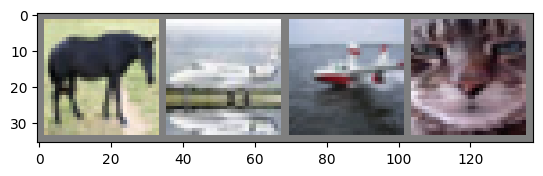

In [15]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [13]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [16]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/4], Step [2000/12500], Loss: 2.3417
Epoch [1/4], Step [4000/12500], Loss: 2.2717
Epoch [1/4], Step [6000/12500], Loss: 2.2787
Epoch [1/4], Step [8000/12500], Loss: 2.2324
Epoch [1/4], Step [10000/12500], Loss: 2.0372
Epoch [1/4], Step [12000/12500], Loss: 2.2391
Epoch [2/4], Step [2000/12500], Loss: 1.4083
Epoch [2/4], Step [4000/12500], Loss: 1.8235
Epoch [2/4], Step [6000/12500], Loss: 2.2314
Epoch [2/4], Step [8000/12500], Loss: 1.4651
Epoch [2/4], Step [10000/12500], Loss: 1.6247
Epoch [2/4], Step [12000/12500], Loss: 1.7849
Epoch [3/4], Step [2000/12500], Loss: 1.6546
Epoch [3/4], Step [4000/12500], Loss: 1.1759
Epoch [3/4], Step [6000/12500], Loss: 1.6022
Epoch [3/4], Step [8000/12500], Loss: 1.9434
Epoch [3/4], Step [10000/12500], Loss: 1.7046
Epoch [3/4], Step [12000/12500], Loss: 1.7625
Epoch [4/4], Step [2000/12500], Loss: 1.6116
Epoch [4/4], Step [4000/12500], Loss: 1.3008
Epoch [4/4], Step [6000/12500], Loss: 1.8467
Epoch [4/4], Step [8000/12500], Loss: 0.9965
Epoc

In [17]:
print('Finished Training')
PATH = '../data/cnn.pth'
torch.save(model.state_dict(), PATH)

Finished Training


In [23]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 46.56 %
Accuracy of plane: 52.4 %
Accuracy of car: 60.4 %
Accuracy of bird: 41.9 %
Accuracy of cat: 47.3 %
Accuracy of deer: 32.8 %
Accuracy of dog: 25.7 %
Accuracy of frog: 43.9 %
Accuracy of horse: 53.3 %
Accuracy of ship: 59.2 %
Accuracy of truck: 48.7 %
